In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway, kruskal # Numeric Vs categorical for many categories
from scipy.stats import ttest_ind # Numeric Vs categorical

from statsmodels.graphics.gofplots import qqplot #goodness of fit plots

# Aerofit Example (One-way Anova)

In [5]:
df_aerofit = pd.read_csv('../data/aerofit.csv')
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<Axes: xlabel='Product', ylabel='Income'>

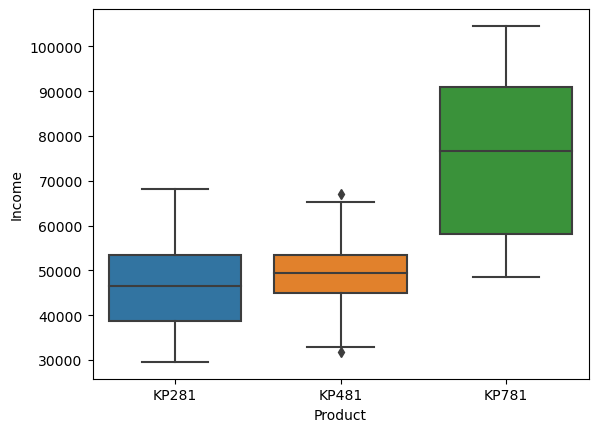

In [7]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)


In [6]:
from scipy.stats import f_oneway

In [8]:
income_kp281 = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
income_kp481 = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
income_kp781 = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

In [9]:
print(income_kp281.mean(),income_kp481.mean(),income_kp781.mean())

46418.025 48973.65 75441.575


In [10]:
# H0: All groups have the same mean
# Ha: One or more groups have different mean
f_stats, p_value = f_oneway(income_kp281, income_kp481, income_kp781)

print("test statistic:",f_stats)
print("p_value:",p_value)

test statistic: 89.25903546601671
p_value: 1.5644991316342494e-27


In [30]:
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group has different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Fail to reject H0
All groups have same mean


In [12]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [13]:
df_aerofit.shape

(180, 9)

In [14]:
df_aerofit["random_group"] = np.random.choice(
    ["g1", "g2", "g3"],
    size=len(df_aerofit))

In [15]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g1
1,KP281,19,Male,15,Single,2,3,31836,75,g2
2,KP281,19,Female,14,Partnered,4,3,30699,66,g1
3,KP281,19,Male,12,Single,3,3,32973,85,g1
4,KP281,20,Male,13,Partnered,4,2,35247,47,g1


<Axes: xlabel='random_group', ylabel='Income'>

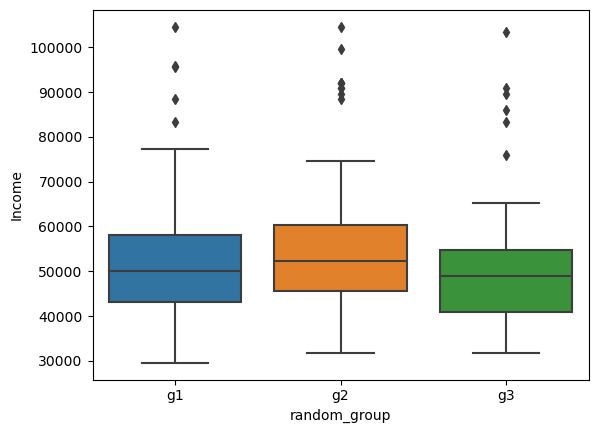

In [16]:
sns.boxplot(x='random_group', y='Income', data=df_aerofit)

In [17]:
income_g1 = df_aerofit[df_aerofit["random_group"]=="g1"]["Income"]
income_g2 = df_aerofit[df_aerofit["random_group"]=="g2"]["Income"]
income_g3 = df_aerofit[df_aerofit["random_group"]=="g3"]["Income"]

In [18]:
# H0: All groups have the same mean
# Ha: One or more groups have different mean
f_stats, p_value = f_oneway(income_g1, income_g2, income_g3)

print("test statistic:",f_stats)
print("p_value:",p_value)

test statistic: 1.1516108920274108
p_value: 0.31848415148793


In [31]:
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Fail to reject H0
All groups have same mean


In [32]:
# Kruskal Wallis Test
# If assumptions of ANOVA fail, use kruskal
stat, p_value = kruskal(income_kp281, income_kp481, income_kp781)

print("test statistic:",stat)
print("p_value:",p_value)

test statistic: 61.43670384567185
p_value: 4.562357014275808e-14


In [22]:
stat, p_value = kruskal(income_g1, income_g2, income_g3)

print("test statistic:",stat)
print("p_value:",p_value)

test statistic: 2.7180060371950976
p_value: 0.25691679057412065


# Normality Tests

In [33]:

df_hw = pd.read_csv('../data/weight-height.csv')

In [34]:
df_hw.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height', ylabel='Count'>

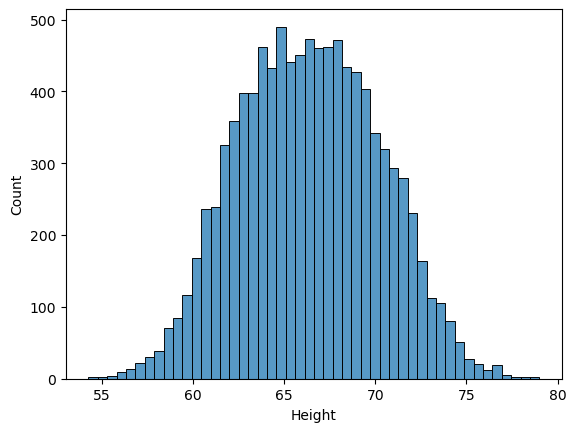

In [35]:
height = df_hw["Height"]
sns.histplot(height)

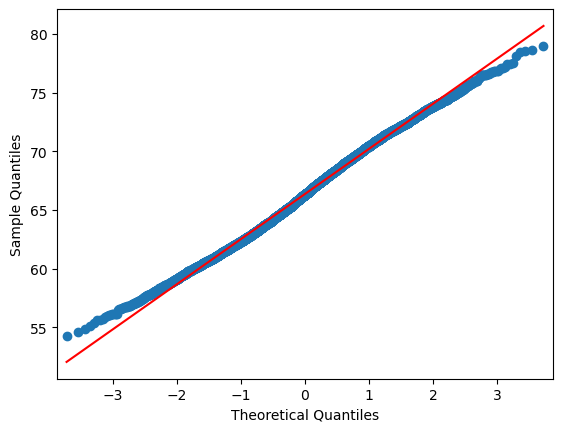

In [36]:
#QQ plot
qqplot(height, line="s")
plt.show()

In [38]:

df_wt = pd.read_csv('../data/waiting_time.csv')
df_wt.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<Axes: xlabel='time', ylabel='Count'>

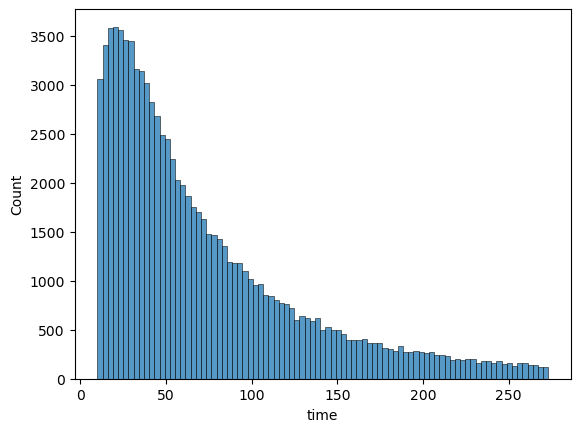

In [39]:
sns.histplot(df_wt["time"])


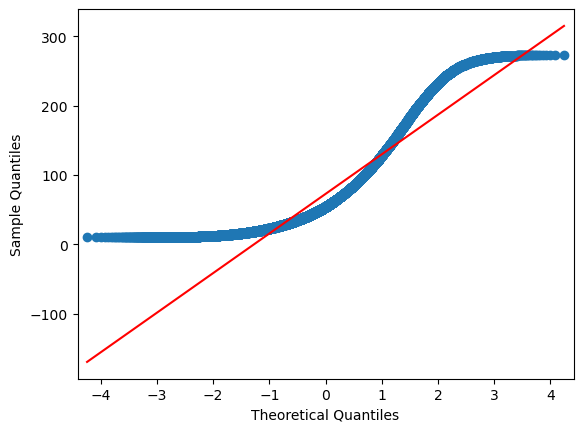

In [40]:
qqplot(df_wt["time"], line="s")
plt.show()

In [41]:
# Statistical test for normality  - Shapiro Wilks Test
from scipy.stats import shapiro

In [42]:
height.shape

(10000,)

In [43]:
# Ideally we should pass data of sample size between 50 and 200
height_subset = height.sample(100)

In [44]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(height_subset)
print(p_value)

0.3704720139503479


In [45]:
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

Fail to reject H0
Data is Gaussian


In [46]:
df_wt_subset = df_wt.sample(50)["time"]

In [47]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(df_wt_subset)
print(p_value)

1.4698514860356227e-05


In [48]:
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

Reject H0
Data is not Gaussian



# Similarity of variance

In [49]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height', ylabel='Count'>

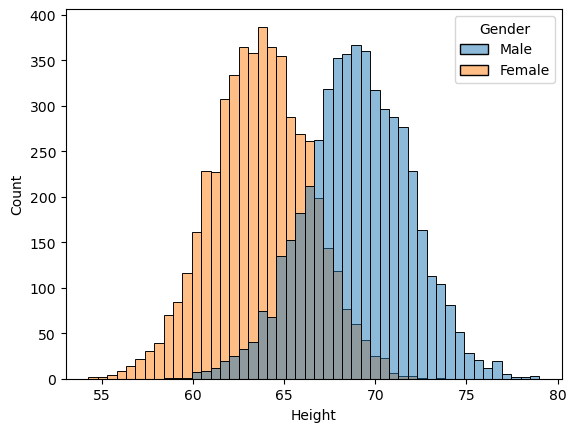

In [50]:
sns.histplot(data=df_hw, x="Height", hue="Gender")


In [51]:
height_men = df_hw[df_hw["Gender"]=="Male"]["Height"]
height_women = df_hw[df_hw["Gender"]=="Female"]["Height"]

In [52]:
print(height_men.std())
print(height_women.std())

2.863362228660651
2.696284015765055


In [53]:
# Levene Test - Statistical test for checking similarity of variance
from scipy.stats import levene

In [54]:
# H0: Variances are equal
# Ha: Variances are not equal

stat, p_val = levene(height_men,height_women)
print(p_val)

0.0004586349895436178


In [55]:
if p_value < 0.05:
    print("Variances are not equal")

Variances are not equal
